# Normálne rozdelenie

Funkcia hustoty pravdepodobnosti jednorozmerného Gaussovho alebo normálneho rozdelenia je daná ako

\begin{equation}
p(x) = \frac{1}{\sigma \sqrt{2 \pi}} \, exp \left[ \frac{-(x-\mu)^2}{2 \sigma^2} \right]   
\end{equation}

Pre množinu hodnôt náhodnej premennej distribuovanej podľa normálneho rozdelenia sa používa aj označenie $X \sim \mathcal{N}(\mu, \sigma^2)$. <b>Dôležitou vlastnosťou normálneho rozdelenie je, že popisuje náhodnú premennú dvoma parametrami - strednou hodnotou a rozptylom </b>. 

In [1]:
%reset -f  
%matplotlib inline

from numpy import *
from numpy.random import normal, randn
import matplotlib.pyplot as plt

# Priklad - generovanie hodnot premennej podla nahodneho rozdelenia
#           a urcenie hodnot rozdelovacej funkcie premennej

m = 10000                   # pocet hodnot
mean, sigma = 2., 0.5       # parametre normalneho rozdelenia       

X = normal(mean, sigma, m)  # normalne rozdelenie
X = randn(m)*sigma + mean   # alternativny postup 

Hodnota $\sigma$ určuje veľkosť rozptylu, zároveň jej násobkami sú definované pásma so stanoveným percentuálnym zastúpením počtu hodnôt. V pásme $\mu \pm 3 \sigma$ sa vyskytuje 99.7%, v pásme $\mu \pm 2 \sigma$ 95.45% a v pásme $\mu \pm 1 \sigma$ 68.27% hodnôt náhodnej premennej (<i>3-sigma rule, 68-95-99.7 rule</i>).

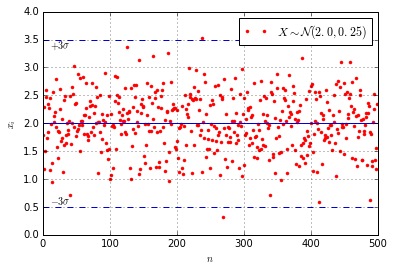

In [2]:
# Priklad - Zobrazenie hodnot nahodnej premennej s 3-sigma hranicami

n=500     # pocet zobrazenych hodnot

plt.plot(X[0:n], 'r.', label=r'$X \sim \mathcal{N}('+str(mean)+','+str(sigma**2)+')$')
plt.plot([0,n],[mean, mean], 'b')
plt.plot([0,n],[mean + 3*sigma, mean + 3*sigma], 'b--')
plt.plot([0,n],[mean - 3*sigma, mean - 3*sigma], 'b--')
plt.text(10,mean + 3*sigma-0.15, '$+3 \sigma $')
plt.text(10,mean - 3*sigma+0.05, '$-3 \sigma $')
plt.xlim(0, n)
plt.ylim(mean - 4*sigma, mean + 4*sigma)
plt.xlabel('$n$')
plt.ylabel('$x_i$')
plt.legend()
plt.grid()
plt.show()

Pre výpočet hodnôt rozdelovacej funkcie náhodnej premennej môžeme využiť funkciu histogram, ktorá vytvorí pole početnosti hodnôt premennej podľa zadaného počtu intervalov hodnôt.

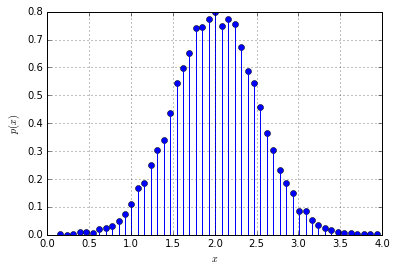

In [3]:
# Priklad -  Vypocet funkcie pravdepodobnosti pomocou histogramu

q, b = histogram(X, 50)     # vrati hodnoty pocetnosti q a hranice intervalov (length(p)+1)
p = q /m /(b[1]-b[0])       # hodnoty funkcie pravdepodobnosti p(x) 
                            # normovane na sirku intervalu histogramu - integral p(x) musi by = 1
    
x = (b[:-1] + b[1:])/2.     # vypocet hodnot stredov intervalov x
plt.stem(x,p)               # vykreslenie pdf
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.grid()
plt.show()

Pre vykreslenie pdf môžeme použiť aj funkcie z knižnice Matplotlib. 

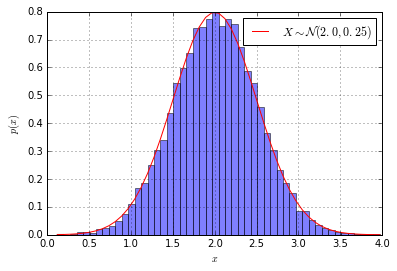

In [4]:
# Priklad - Vykreslenie normovanej hustoty pravdepodobnosti (pdf)

_, x, _ = plt.hist(X, 50, normed=True, alpha=0.5)   # normovany histogram, 
                                                    # vrati hodnoty x z histogramu
# Doplnenie zobrazenia analytickeho tvaru pdf
plt.plot(x, 1/(sigma*sqrt(2 * pi))*exp(-(x - mean)**2 / (2*sigma**2) ), 'r-', 
            label=r'$X  \sim \mathcal{N}('+str(mean)+','+str(sigma**2)+')$')
plt.legend()
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.show()

Funkcia rozdelenia pravdepodobnosti $P(x)$ pre normálne rozdelenie je definovaná ako

\begin{equation}
P(x) = P(X < x) = \int_{-\infty}^x p(z) \, dz =   \frac{1}{\sigma \sqrt{2 \pi}} \int_{-\infty}^x exp \left[ \frac{-(z-\mu)^2}{2 \sigma^2} \right] dz   
\end{equation}

Integrál nemá analytické riešenie a musí sa riešiť numericky, existujú ale vhodné aproximácie pre analytické výpočty.

<i>Poznámka</i> 

Chuck Norris údajne tento integrál spočítal, dokonca aj pre premennú $X = []$ s normálnym rozdelením.

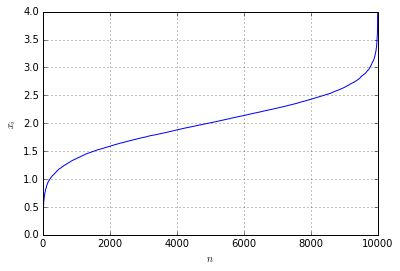

In [5]:
# Priklad - Urcenie hodnot pre nahodnu premennu X

s = sort(X)                             # utriedenie hodnot premennej X 
plt.xlabel('$n$')                       # podla velkosti v poli s
plt.ylabel('$x_i$')
plt.plot(s)                             # zobrazenie utriedenych hodnot
plt.grid()
plt.show()

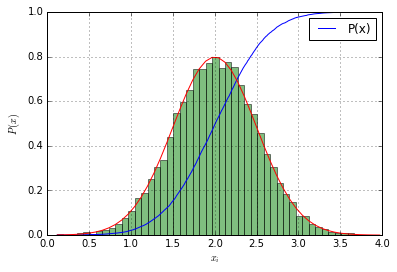

In [6]:
n = arange(len(X)) / (len(X) - 1.0)       # normovanie pocetnosti hodnot <0,1>
plt.plot(s, n, label='P(x)')              # zobrazenie P(x)

plt.hist(X, 50, normed=True, alpha=0.5)   # doplnenie grafu
plt.plot(x, 1/(sigma*sqrt(2 * pi))*exp(-(x - mean)**2 / (2*sigma**2) ), 'r-')
plt.ylabel('$P\,(x)$')
plt.xlabel('$x_i$')
plt.legend()
plt.grid()
plt.show()

### Literatura

Normálne rozdelenie

https://en.wikipedia.org/wiki/Normal_distribution